In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [5]:
im = io.imread('images/image_00003.jpg')

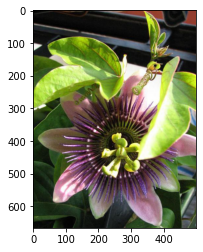

In [6]:
plt.imshow(im); plt.show()

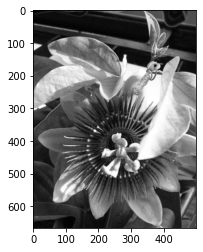

In [28]:
plt.imshow(im, cmap='gray')

In [296]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [29]:
import cv2
laplacian = cv2.Laplacian(im,cv2.CV_64F)

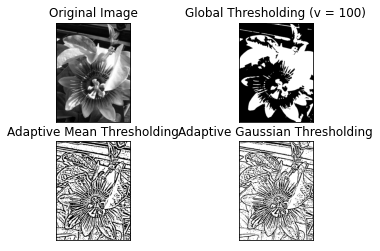

In [295]:
img = cv2.imread('images/image_00003.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 100)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [412]:
def remove_green (image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ret, threshold = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
  
  for row in range(len(threshold)):
    for col in range(len(threshold[row])):
      if (list(threshold[row][col]) == [0,255,0]):
        threshold[row][col] = [0,0,0]

  plt.subplot(1,2,1),plt.imshow(img)
  plt.subplot(1,2,2),plt.imshow(threshold)

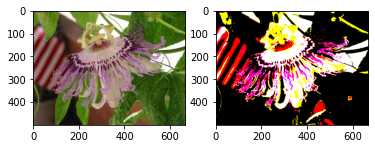

In [413]:
remove_green('images/image_00007.jpg')

In [299]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [304]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [333]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [np.around(ordered_colors[i]) for i in counts.keys()]

  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = rgb_colors, colors = hex_colors)

  return rgb_colors

In [332]:
np.around(ordered_colors[1])

array([57., 59., 40.])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[array([55., 24., 22.]),
 array([44., 77., 11.]),
 array([145., 111., 113.]),
 array([116., 138.,  53.]),
 array([247., 248., 240.]),
 array([105.,  65.,  57.]),
 array([ 75., 108.,  26.]),
 array([183., 158., 144.])]

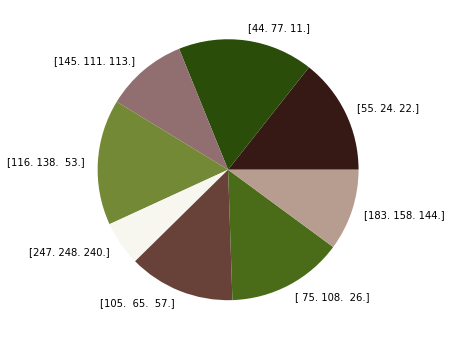

In [339]:
get_colors(get_image('images/image_00007.jpg'), 8, True)

In [340]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('images/image_00003.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


cluster centres:
 [[177.30606282 207.97187728  79.07596786]
 [234.97028738 228.41354116 204.74281539]
 [ 28.52282057  31.84931176  21.12569428]
 [150.40282686 125.097655   128.73401863]
 [ 92.77478619  94.57127019  52.1271777 ]]
most frequent is [28.52282057 31.84931176 21.12569428] (#1c1f15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead


In [341]:
import imageio
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==i)],:] = code
imageio.imwrite('clusters.png', c.reshape(*shape).astype(np.uint8))
print('saved clustered image')

saved clustered image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  after removing the cwd from sys.path.


In [337]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

In [283]:
ret

100.0

In [284]:
th1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

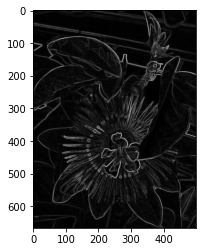

In [64]:
im_edge = filters.sobel(im)
plt.imshow(im_edge, cmap='gray')

In [42]:
im_edge.shape

(667, 500)

In [52]:
type(im_edge[0])

numpy.ndarray

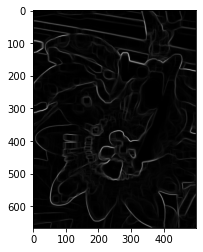

In [272]:
im = cv2.imread('images/image_00003.jpg',0)
im_smooth = filters.rank.percentile(im, np.ones((21,21)), p0=0.9)
im_edge = filters.sobel(im_smooth)
plt.imshow(im_edge, cmap='gray')

In [277]:
im_edge_contour = im_edge.copy()
for i in range(im_edge_contour.shape[0]):

  limits = np.where (im_edge_contour[i] >= 0.20)
  limits_clean = []
  if len(limits[0])!=0:
    limits_clean.append(limits[0][0])
    for limit_i in range(1,len(limits[0])):
      if limits[0][limit_i]-limits[0][limit_i - 1] > 1:
        limits_clean.append(limits[0][limit_i])

  im_edge_contour[i] = np.zeros(len(im_edge_contour[i]))


  if len(limits_clean)!=0:
    for limit_index in range(0,len(limits_clean),2):
      if (len(limits_clean) % 2 == 0):
        im_edge_contour[i][limits_clean[limit_index]:limits_clean[limit_index+1]] = 1
      else:
        im_edge_contour[i][limits_clean[limit_index]:len(im_edge_contour)] = 1

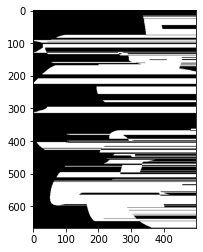

In [278]:
plt.imshow(im_edge_contour, cmap='gray')

In [194]:
limits

(array([], dtype=int64),)

In [187]:
im_edge_contour[300]

0.0

In [188]:
limits = np.where (im_edge_contour[300] >= 0.25)
limits_clean = []
limits_clean.append(limits[0][0])
for limit_i in range(1,len(limits[0])):
  if limits[0][limit_i]-limits[0][limit_i - 1] > 1:
    limits_clean.append(limits[0][limit_i])

im_edge_contour[300] = np.zeros(len(im_edge_contour[300]))


if len(limits_clean)!=0:
  for limit_index in range(0,len(limits_clean),2):
    if (len(limits_clean) % 2 == 0):
      im_edge_contour[300][limits_clean[limit_index]:limits_clean[limit_index+1]] = 1
    else:
      im_edge_contour[300][limits_clean[limit_index]:len(im_edge_contour[300])] = 1

In [199]:
im_edge_contour[300][400:700]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

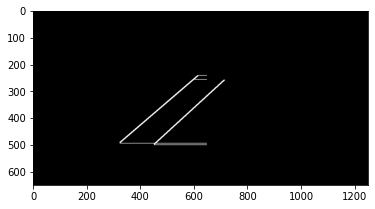

In [206]:
plt.imshow(im_edge_contour, cmap='gray')

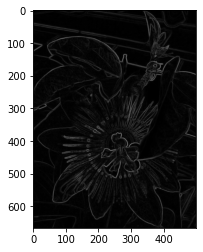

In [71]:
plt.imshow(im_edge_contour, cmap='gray')